<a href="https://colab.research.google.com/github/galaxy-kim/Python_note_backup/blob/main/10~11_jan_groupactivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##이상치 제거 전(원데이터)로 진행

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [4]:
df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/ubion_given_data/행정구역별_통계자료(2019,2020,2021).xlsx")
df

,행정구역별_ID,행정구역별,신혼부부_수,맞벌이_부부_수,평균_출생아_수,1인당_개인소득,1인당_지역총소득,1인당_민간소비지출액,총_가구,주택소유_가구,무주택_가구,연도
0,0,전국,1101455,569472,0.80,22220,40571,18435,21448463,12062871,9385592,2021
1,1,서울특별시,200477,118770,0.62,25256,54209,22613,4046799,1974544,2072255,2021
2,2,부산광역시,62431,31683,0.79,21352,32014,18693,1431365,822769,608596,2021
3,3,대구광역시,45094,22219,0.83,21046,29353,18378,1000931,579620,421311,2021
4,4,인천광역시,65347,31551,0.81,21317,35818,17170,1183610,677602,506008,2021
5,5,광주광역시,29596,15723,0.90,22472,32999,18829,615693,354979,260714,2021
6,6,대전광역시,30342,16157,0.82,22730,33810,19146,640085,338038,302047,2021
7,7,울산광역시,24721,11467,0.87,25165,59346,19211,451432,289774,161658,2021
8,8,세종특별자치시,11475,6905,0.82,22061,39730,17198,145295,77538,67757,2021
9,9,경기도,325067,168226,0.76,21937,41011,17743,5290662,2960542,2330120,2021


In [5]:
#모형기반 선택

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

X=df.drop(['행정구역별','1인당_민간소비지출액'],axis=1)
Y=df['1인당_민간소비지출액']

#데이터 분할
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

selector=SelectFromModel(RandomForestRegressor(n_estimators=100,random_state=0),threshold="median")
selector.fit(X_train,Y_train)

score=pd.DataFrame()
score["attribute"]=X_train.columns
score["support"]=selector.get_support()
score[score["support"]==True]

,attribute,support
0,행정구역별_ID,True
3,평균_출생아_수,True
4,1인당_개인소득,True
5,1인당_지역총소득,True
8,무주택_가구,True


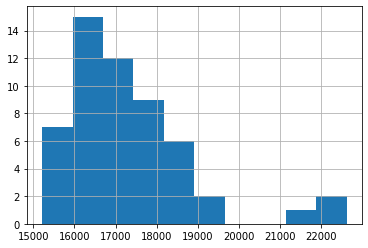

In [6]:
import seaborn as sns
import numpy as np

df["1인당_민간소비지출액"].hist()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48124 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_

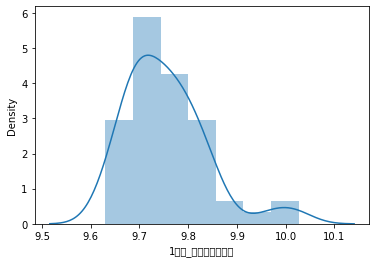

In [7]:
df["1인당_민간소비지출액"]=np.log1p(df["1인당_민간소비지출액"])
sns.distplot(df["1인당_민간소비지출액"])

In [8]:
df.columns

Index(['행정구역별_ID', '행정구역별', '신혼부부_수', '맞벌이_부부_수', '평균_출생아_수', '1인당_개인소득',
       '1인당_지역총소득', '1인당_민간소비지출액', '총_가구', '주택소유_가구', '무주택_가구', '연도'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder #범주형 변수를 정수로 인식하는 것을 방지하기 위해 사용

num=["평균_출생아_수","1인당_개인소득","1인당_지역총소득","무주택_가구"]
cg=["행정구역별_ID"]

X=df[num+cg]
Y=df["1인당_민간소비지출액"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#표준화, 원핫인코딩
ct=ColumnTransformer([("scling",StandardScaler(),num),("onehot",OneHotEncoder(sparse=False),cg)])
ct.fit(X_train)
X_train=ct.transform(X_train)
X_test=ct.transform(X_test)

print(X_train[0])

[-0.06928088  2.48015786  2.8041152  -0.43979074  0.          0.
  0.          0.          0.          0.          0.          1.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]


## 선형회귀
### 릿지,라쏘,엘라스틱넷

In [10]:
##선형회귀

from sklearn.linear_model import LinearRegression #선형모델
from sklearn.metrics import mean_squared_error #MSE
from math import sqrt #루트

lr=LinearRegression().fit(X_train,Y_train)

Y_pred=lr.predict(X_test)
print("predict value\n", Y_pred)
print("train R2:{:.3f}".format(lr.score(X_train,Y_train))) #train set_R2
print("test R2:{:.3f}".format(lr.score(X_test,Y_test)))

rmse=sqrt(mean_squared_error(Y_test,Y_pred)) #RMSE
print("RMSE : {:.3f}".format(rmse)) #오차의 합 → 0에 가까울수록 좋다

predict value
 [ 9.72465799  9.70490296  9.65490379  9.6984749   9.66881469  9.78196591
  9.68626071  9.84200672  9.8132888   9.66762377  9.70878078  9.73640279
  9.72647357  9.69691114  9.68901379  9.79382128 10.02306631]
train R2:0.964
test R2:0.851
RMSE : 0.034


In [11]:
print("절편",np.round(lr.intercept_,3)) #x가 모두 0일 때(y절편,상수항)
print("가중치(beta)",np.round(lr.coef_,3))

#β가 22개 : num 4개, cg 1개(18개 범주)

절편 9.774
가중치(beta) [ 0.19   0.059  0.1    0.081 -0.152  0.408  0.261  0.246  0.103  0.026
  0.194 -0.27   0.058  0.113  0.041 -0.137 -0.211 -0.143 -0.381 -0.114
 -0.031 -0.01 ]


In [12]:
##릿지

from sklearn.linear_model import Ridge

lr_ridge=Ridge(random_state=0).fit(X_train,Y_train)
Y_pred=lr_ridge.predict(X_test)

print("예측값(Y predict value)\n",Y_pred)
rmse=sqrt(mean_squared_error(Y_test,Y_pred))
print("R2 : {:.3f}".format(lr_ridge.score(X_train,Y_train)))
print("RMSE : {:.3f}".format(rmse))

예측값(Y predict value)
 [9.69162358 9.70722863 9.67731786 9.76023899 9.71349272 9.78931606
 9.69257439 9.76824767 9.73967574 9.70602277 9.77564002 9.76760086
 9.74568031 9.74537249 9.69376289 9.74120065 9.93896895]
R2 : 0.885
RMSE : 0.049


In [13]:
#라쏘

from sklearn.linear_model import Lasso

lr_lasso=Lasso(random_state=0,alpha=0.01,max_iter=1000).fit(X_train,Y_train)
Y_pred=lr_lasso.predict(X_test)

print("예측값(Y predict value)\n",Y_pred)
rmse=sqrt(mean_squared_error(Y_test,Y_pred))
print("lasso R2 : {:.3f}".format(lr_lasso.score(X_train,Y_train)))
print("RMSE : {:.3f}".format(rmse))

예측값(Y predict value)
 [9.69287447 9.71775786 9.70463764 9.78670964 9.75757414 9.79363965
 9.69221565 9.75598277 9.7718085  9.73661774 9.78740404 9.75932808
 9.73650058 9.75653302 9.71121554 9.74330008 9.885518  ]
lasso R2 : 0.701
RMSE : 0.063


In [14]:
#엘라스틱넷

from sklearn.linear_model import ElasticNet

lr_ela=ElasticNet(alpha=0.01).fit(X_train,Y_train)
Y_pred=lr_ela.predict(X_test)

print("예측값(Y predict value)\n",Y_pred)

rmse=sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE : {:.3f}".format(rmse))
print("ela R2 : {:.3f}".format(lr_ela.score(X_train,Y_train)))

예측값(Y predict value)
 [9.68647698 9.71339996 9.69927233 9.78919356 9.75678929 9.79704254
 9.68460697 9.7554626  9.77314826 9.73396587 9.79007023 9.75880685
 9.73396867 9.75644196 9.70583947 9.74219296 9.89752309]
RMSE : 0.061
ela R2 : 0.715


In [15]:
#선형, 릿지, 라쏘, 엘라스틱넷 R2 비교
print("lr R2 : {:.3f}".format(lr.score(X_train,Y_train)))
print("ridge R2 : {:.3f}".format(lr_ridge.score(X_train,Y_train)))
print("lasso R2 : {:.3f}".format(lr_lasso.score(X_train,Y_train)))
print("ela R2 : {:.3f}".format(lr_ela.score(X_train,Y_train)))

lr R2 : 0.964
ridge R2 : 0.885
lasso R2 : 0.701
ela R2 : 0.715


## 모델 생성
### KNN, DT, SVM, Naive Bayes

In [16]:
#KNN
import numpy as np

X=df[["평균_출생아_수","1인당_개인소득","1인당_지역총소득","무주택_가구","행정구역별_ID"]]
Y=df["1인당_민간소비지출액"]
Y=np.log1p(Y)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

scaler=StandardScaler().fit(X_train,Y_train)
X_test=scaler.transform(X_test)
X_train=scaler.transform(X_train)

from sklearn.neighbors import KNeighborsRegressor
knn_reg=KNeighborsRegressor(n_neighbors=9,p=2)

knn_reg.fit(X_train,Y_train)
Y_pred=knn_reg.predict(X_test)
print("accuracy : {:.3f}".format(knn_reg.score(X_train,Y_train))) #train accuracy(regression → 예측값에 대해선 발생하지 않음)
rmse=sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE : {:.3f}".format(rmse))

accuracy : 0.648
RMSE : 0.006


In [17]:
#DT
X=df[["평균_출생아_수","1인당_개인소득","1인당_지역총소득","무주택_가구","행정구역별_ID"]]
Y=df["1인당_민간소비지출액"]
Y=np.log1p(Y)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

from sklearn.tree import DecisionTreeRegressor

DT_model_reg=DecisionTreeRegressor(random_state=0,max_depth=5)
DT_model_reg.fit(X_train,Y_train)
Y_pred=DT_model_reg.predict(X_test)
print("accurary : {:.3f}".format(DT_model_reg.score(X_train,Y_train)))
rmse=sqrt(mean_squared_error(Y_test,Y_pred))
print("rmse : {:.3f}".format(rmse))

accurary : 0.989
rmse : 0.004


In [18]:
#SVM
X=df[["평균_출생아_수","1인당_개인소득","1인당_지역총소득","무주택_가구","행정구역별_ID"]]
Y=df["1인당_민간소비지출액"]
Y=np.log1p(Y)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

scaler=StandardScaler().fit(X_train,Y_train)
X_test=scaler.transform(X_test)
X_train=scaler.transform(X_train)

from sklearn.svm import SVR

SVR_model=SVR(C=1,kernel="linear",epsilon=0.1)
SVR_model.fit(X_train,Y_train)
Y_pred=SVR_model.predict(X_test)
print("accurary : {:.3f}".format(SVR_model.score(X_train,Y_train)))
rmse=sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE : {:.3f}".format(rmse))
print(SVR_model.coef_)

accurary : -0.635
RMSE : 0.012
[[0. 0. 0. 0. 0.]]


In [19]:
#Naive Bayes
X=df[["평균_출생아_수","1인당_개인소득","1인당_지역총소득","무주택_가구","행정구역별_ID"]]
Y=df["1인당_민간소비지출액"]
Y=np.log1p(Y)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

from sklearn.linear_model import BayesianRidge

NB_model_reg=BayesianRidge(alpha_1=0.001,lambda_1=0.001)
NB_model_reg.fit(X_train,Y_train)
Y_pred=NB_model_reg.predict(X_test)
print("accurary : {:.3f}".format(NB_model_reg.score(X_train,Y_train)))
rmse=sqrt(mean_squared_error(Y_test,Y_pred))
print("rmse : {:.3f}".format(rmse))
print(NB_model_reg.coef_)

accurary : 0.754
rmse : 0.006
[-8.56422245e-05  3.32466036e-06 -1.39064696e-07 -1.72500721e-10
 -4.95410657e-04]


##모델 성능 비교

In [20]:
#분류모형
X1=df[["평균_출생아_수","1인당_개인소득","1인당_지역총소득","무주택_가구","행정구역별_ID"]]
Y1=df["1인당_민간소비지출액"]

In [21]:
X1

,평균_출생아_수,1인당_개인소득,1인당_지역총소득,무주택_가구,행정구역별_ID
0,0.80,22220,40571,9385592,0
1,0.62,25256,54209,2072255,1
2,0.79,21352,32014,608596,2
3,0.83,21046,29353,421311,3
4,0.81,21317,35818,506008,4
5,0.90,22472,32999,260714,5
6,0.82,22730,33810,302047,6
7,0.87,25165,59346,161658,7
8,0.82,22061,39730,67757,8
9,0.76,21937,41011,2330120,9


In [22]:
Y1

0      9.822061
1     10.026324
2      9.835958
3      9.818964
4      9.750977
5      9.843207
6      9.859901
7      9.863290
8      9.752607
9      9.783803
10     9.745546
11     9.686450
12     9.700147
13     9.690109
14     9.695971
15     9.708324
16     9.739909
17     9.757652
18     9.759675
19     9.961096
20     9.762270
21     9.757131
22     9.684087
23     9.775825
24     9.782223
25     9.787908
26     9.690232
27     9.724480
28     9.692396
29     9.630103
30     9.643875
31     9.639001
32     9.644846
33     9.646916
34     9.673508
35     9.694493
36     9.801344
37     9.998434
38     9.805599
39     9.796181
40     9.714323
41     9.816131
42     9.804551
43     9.829572
44     9.731869
45     9.769613
46     9.735424
47     9.673193
48     9.688064
49     9.686823
50     9.692767
51     9.699656
52     9.712388
53     9.743201
Name: 1인당_민간소비지출액, dtype: float64

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X1,Y1,test_size=0.3,random_state=0)

#Column transformer
ct=ColumnTransformer([("scaling",StandardScaler(),["평균_출생아_수","1인당_개인소득","1인당_지역총소득","무주택_가구"]),
                      ("onehot",OneHotEncoder(sparse=False),["행정구역별_ID"])])
ct.fit(X_train)
X_train=ct.transform(X_train)
X_test=ct.transform(X_test)

In [27]:
lr_model=LinearRegression()
knn_model=KNeighborsRegressor(n_neighbors=9)
dt_model=DecisionTreeRegressor(random_state=0,max_depth=3)

In [28]:
lr_model.fit(X_train,Y_train)
knn_model.fit(X_train,Y_train)
dt_model.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [30]:
lr_Y_pred=lr_model.predict(X_test)
knn_Y_pred=knn_model.predict(X_test)
dt_Y_pred=dt_model.predict(X_test)   

In [31]:
print("lr score : {:.3f}".format(lr_model.score(X_train,Y_train)))
print("knn score : {:.3f}".format(knn_model.score(X_train,Y_train)))
print("dt score : {:.3f}".format(dt_model.score(X_train,Y_train)))

lr score : 0.964
knn score : 0.596
dt score : 0.895


In [38]:
lr=LinearRegression().fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
rmse=sqrt(mean_squared_error(Y_test,Y_pred))
print("lr_rmse : {:.3f}".format(rmse)) 

knn_reg.fit(X_train,Y_train)
Y_pred=knn_reg.predict(X_test)
rmse=sqrt(mean_squared_error(Y_test,Y_pred))
print("knn_rmse : {:.3f}".format(rmse))

DT_model_reg=DecisionTreeRegressor(random_state=0,max_depth=5)
DT_model_reg.fit(X_train,Y_train)
Y_pred=DT_model_reg.predict(X_test)
rmse=sqrt(mean_squared_error(Y_test,Y_pred))
print("dt_rmse : {:.3f}".format(rmse))

lr_rmse : 0.034
knn_rmse : 0.061
dt_rmse : 0.050


## 이상치 제거가 범주에 영향을 미치는 경우의 오류

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/ubion_given_data/행정구역별_통계자료(2019,2020,2021).xlsx")
df

,행정구역별_ID,행정구역별,신혼부부_수,맞벌이_부부_수,평균_출생아_수,1인당_개인소득,1인당_지역총소득,1인당_민간소비지출액,총_가구,주택소유_가구,무주택_가구,연도
0,0,전국,1101455,569472,0.80,22220,40571,18435,21448463,12062871,9385592,2021
1,1,서울특별시,200477,118770,0.62,25256,54209,22613,4046799,1974544,2072255,2021
2,2,부산광역시,62431,31683,0.79,21352,32014,18693,1431365,822769,608596,2021
3,3,대구광역시,45094,22219,0.83,21046,29353,18378,1000931,579620,421311,2021
4,4,인천광역시,65347,31551,0.81,21317,35818,17170,1183610,677602,506008,2021
5,5,광주광역시,29596,15723,0.90,22472,32999,18829,615693,354979,260714,2021
6,6,대전광역시,30342,16157,0.82,22730,33810,19146,640085,338038,302047,2021
7,7,울산광역시,24721,11467,0.87,25165,59346,19211,451432,289774,161658,2021
8,8,세종특별자치시,11475,6905,0.82,22061,39730,17198,145295,77538,67757,2021
9,9,경기도,325067,168226,0.76,21937,41011,17743,5290662,2960542,2330120,2021


In [ ]:
df1=df.drop(["행정구역별_ID"],axis=1)
df1

,행정구역별,신혼부부_수,맞벌이_부부_수,평균_출생아_수,1인당_개인소득,1인당_지역총소득,1인당_민간소비지출액,총_가구,주택소유_가구,무주택_가구,연도
0,전국,1101455,569472,0.80,22220,40571,18435,21448463,12062871,9385592,2021
1,서울특별시,200477,118770,0.62,25256,54209,22613,4046799,1974544,2072255,2021
2,부산광역시,62431,31683,0.79,21352,32014,18693,1431365,822769,608596,2021
3,대구광역시,45094,22219,0.83,21046,29353,18378,1000931,579620,421311,2021
4,인천광역시,65347,31551,0.81,21317,35818,17170,1183610,677602,506008,2021
5,광주광역시,29596,15723,0.90,22472,32999,18829,615693,354979,260714,2021
6,대전광역시,30342,16157,0.82,22730,33810,19146,640085,338038,302047,2021
7,울산광역시,24721,11467,0.87,25165,59346,19211,451432,289774,161658,2021
8,세종특별자치시,11475,6905,0.82,22061,39730,17198,145295,77538,67757,2021
9,경기도,325067,168226,0.76,21937,41011,17743,5290662,2960542,2330120,2021


### 이상치

BP(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7eb755670>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7ff7eb6be2e0>, <matplotlib.lines.Line2D object at 0x7ff7eb6be640>], 'caps': [<matplotlib.lines.Line2D object at 0x7ff7eb6be9a0>, <matplotlib.lines.Line2D object at 0x7ff7eb6bed00>], 'boxes': [<matplotlib.lines.Line2D object at 0x7ff7eb721f40>], 'medians': [<matplotlib.lines.Line2D object at 0x7ff7eb6c70a0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7ff7eb6c73a0>], 'means': []})

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48124 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_

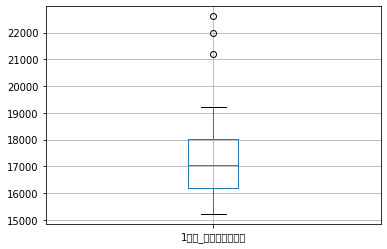

In [ ]:
#이상치 확인
df1.boxplot(column="1인당_민간소비지출액",return_type="both")

In [ ]:
#이상치 제거
q1=df1["1인당_민간소비지출액"].quantile(q=0.25)
q3=df1["1인당_민간소비지출액"].quantile(q=0.75)
IQR=q3-q1
IQR

data_IQR=df1[(df1["1인당_민간소비지출액"]<q3+IQR*1.5)&(df1["1인당_민간소비지출액"]>q1-IQR*1.5)]
data_IQR

df2=data_IQR
df2

,행정구역별,신혼부부_수,맞벌이_부부_수,평균_출생아_수,1인당_개인소득,1인당_지역총소득,1인당_민간소비지출액,총_가구,주택소유_가구,무주택_가구,연도
0,전국,1101455,569472,0.80,22220,40571,18435,21448463,12062871,9385592,2021
2,부산광역시,62431,31683,0.79,21352,32014,18693,1431365,822769,608596,2021
3,대구광역시,45094,22219,0.83,21046,29353,18378,1000931,579620,421311,2021
4,인천광역시,65347,31551,0.81,21317,35818,17170,1183610,677602,506008,2021
5,광주광역시,29596,15723,0.90,22472,32999,18829,615693,354979,260714,2021
6,대전광역시,30342,16157,0.82,22730,33810,19146,640085,338038,302047,2021
7,울산광역시,24721,11467,0.87,25165,59346,19211,451432,289774,161658,2021
8,세종특별자치시,11475,6905,0.82,22061,39730,17198,145295,77538,67757,2021
9,경기도,325067,168226,0.76,21937,41011,17743,5290662,2960542,2330120,2021
10,강원도,31767,16088,0.89,21038,30858,17077,674728,391373,283355,2021


In [ ]:
df2.columns

Index(['행정구역별', '신혼부부_수', '맞벌이_부부_수', '평균_출생아_수', '1인당_개인소득', '1인당_지역총소득',
       '1인당_민간소비지출액', '총_가구', '주택소유_가구', '무주택_가구', '연도'],
      dtype='object')

### 오류확인

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


num=['신혼부부_수', '맞벌이_부부_수', '평균_출생아_수', '1인당_개인소득', '1인당_지역총소득']
cg=['행정구역별']

X=df2[num+cg]
Y=df2["1인당_민간소비지출액"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#표준화, 원핫인코딩
ct=ColumnTransformer([("scling",StandardScaler(),num),("onehot",OneHotEncoder(sparse=False),cg)])
ct.fit(X_train)
X_train=ct.transform(X_train)
X_test=ct.transform(X_test)

print(X_train[0])

## 이상치 제거한 값으로 돌리면 오류 발생
### ValueError: Found unknown categories ['충청남도'] in column 0 during transform

ValueError: ignored

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


num=['신혼부부_수', '맞벌이_부부_수', '평균_출생아_수', '1인당_개인소득', '1인당_지역총소득']
cg=['행정구역별']

X=df1[num+cg]
Y=df1["1인당_민간소비지출액"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#표준화, 원핫인코딩
ct=ColumnTransformer([("scling",StandardScaler(),num),("onehot",OneHotEncoder(sparse=False),cg)])
ct.fit(X_train)
X_train=ct.transform(X_train)
X_test=ct.transform(X_test)

print(X_train[0])

## 이상치 제거 전 값으로 돌리면 적용됨

[-0.42393632 -0.42879856 -0.06928088  2.48015786  2.8041152   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          1.          0.          0.
  0.          0.          0.          0.          0.        ]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


num=['신혼부부_수', '맞벌이_부부_수', '평균_출생아_수', '1인당_개인소득', '1인당_지역총소득']
cg=['행정구역별_ID']

X=df[num+cg]
Y=df["1인당_민간소비지출액"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#표준화, 원핫인코딩
ct=ColumnTransformer([("scling",StandardScaler(),num),("onehot",OneHotEncoder(sparse=False),cg)])
ct.fit(X_train)
X_train=ct.transform(X_train)
X_test=ct.transform(X_test)

print(X_train[0])

## ID drop, 이상치 제거 전 데이터로 돌리면 "행정구역별_ID"도 값이 나옴

[-0.42393632 -0.42879856 -0.06928088  2.48015786  2.8041152   0.
  0.          0.          0.          0.          0.          0.
  1.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]
